In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor, plot_tree

df = pd.read_csv('heart_disease.csv')
df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [74]:
df.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [75]:
df['cholesterol'].value_counts()

cholesterol
0      172
254     16
211     13
204     13
234     13
      ... 
316      1
278      1
157      1
176      1
131      1
Name: count, Length: 222, dtype: int64

In [76]:
df['resting bp s'].value_counts()

resting bp s
120    166
130    149
140    137
110     76
150     73
      ... 
0        1
185      1
96       1
127      1
164      1
Name: count, Length: 67, dtype: int64

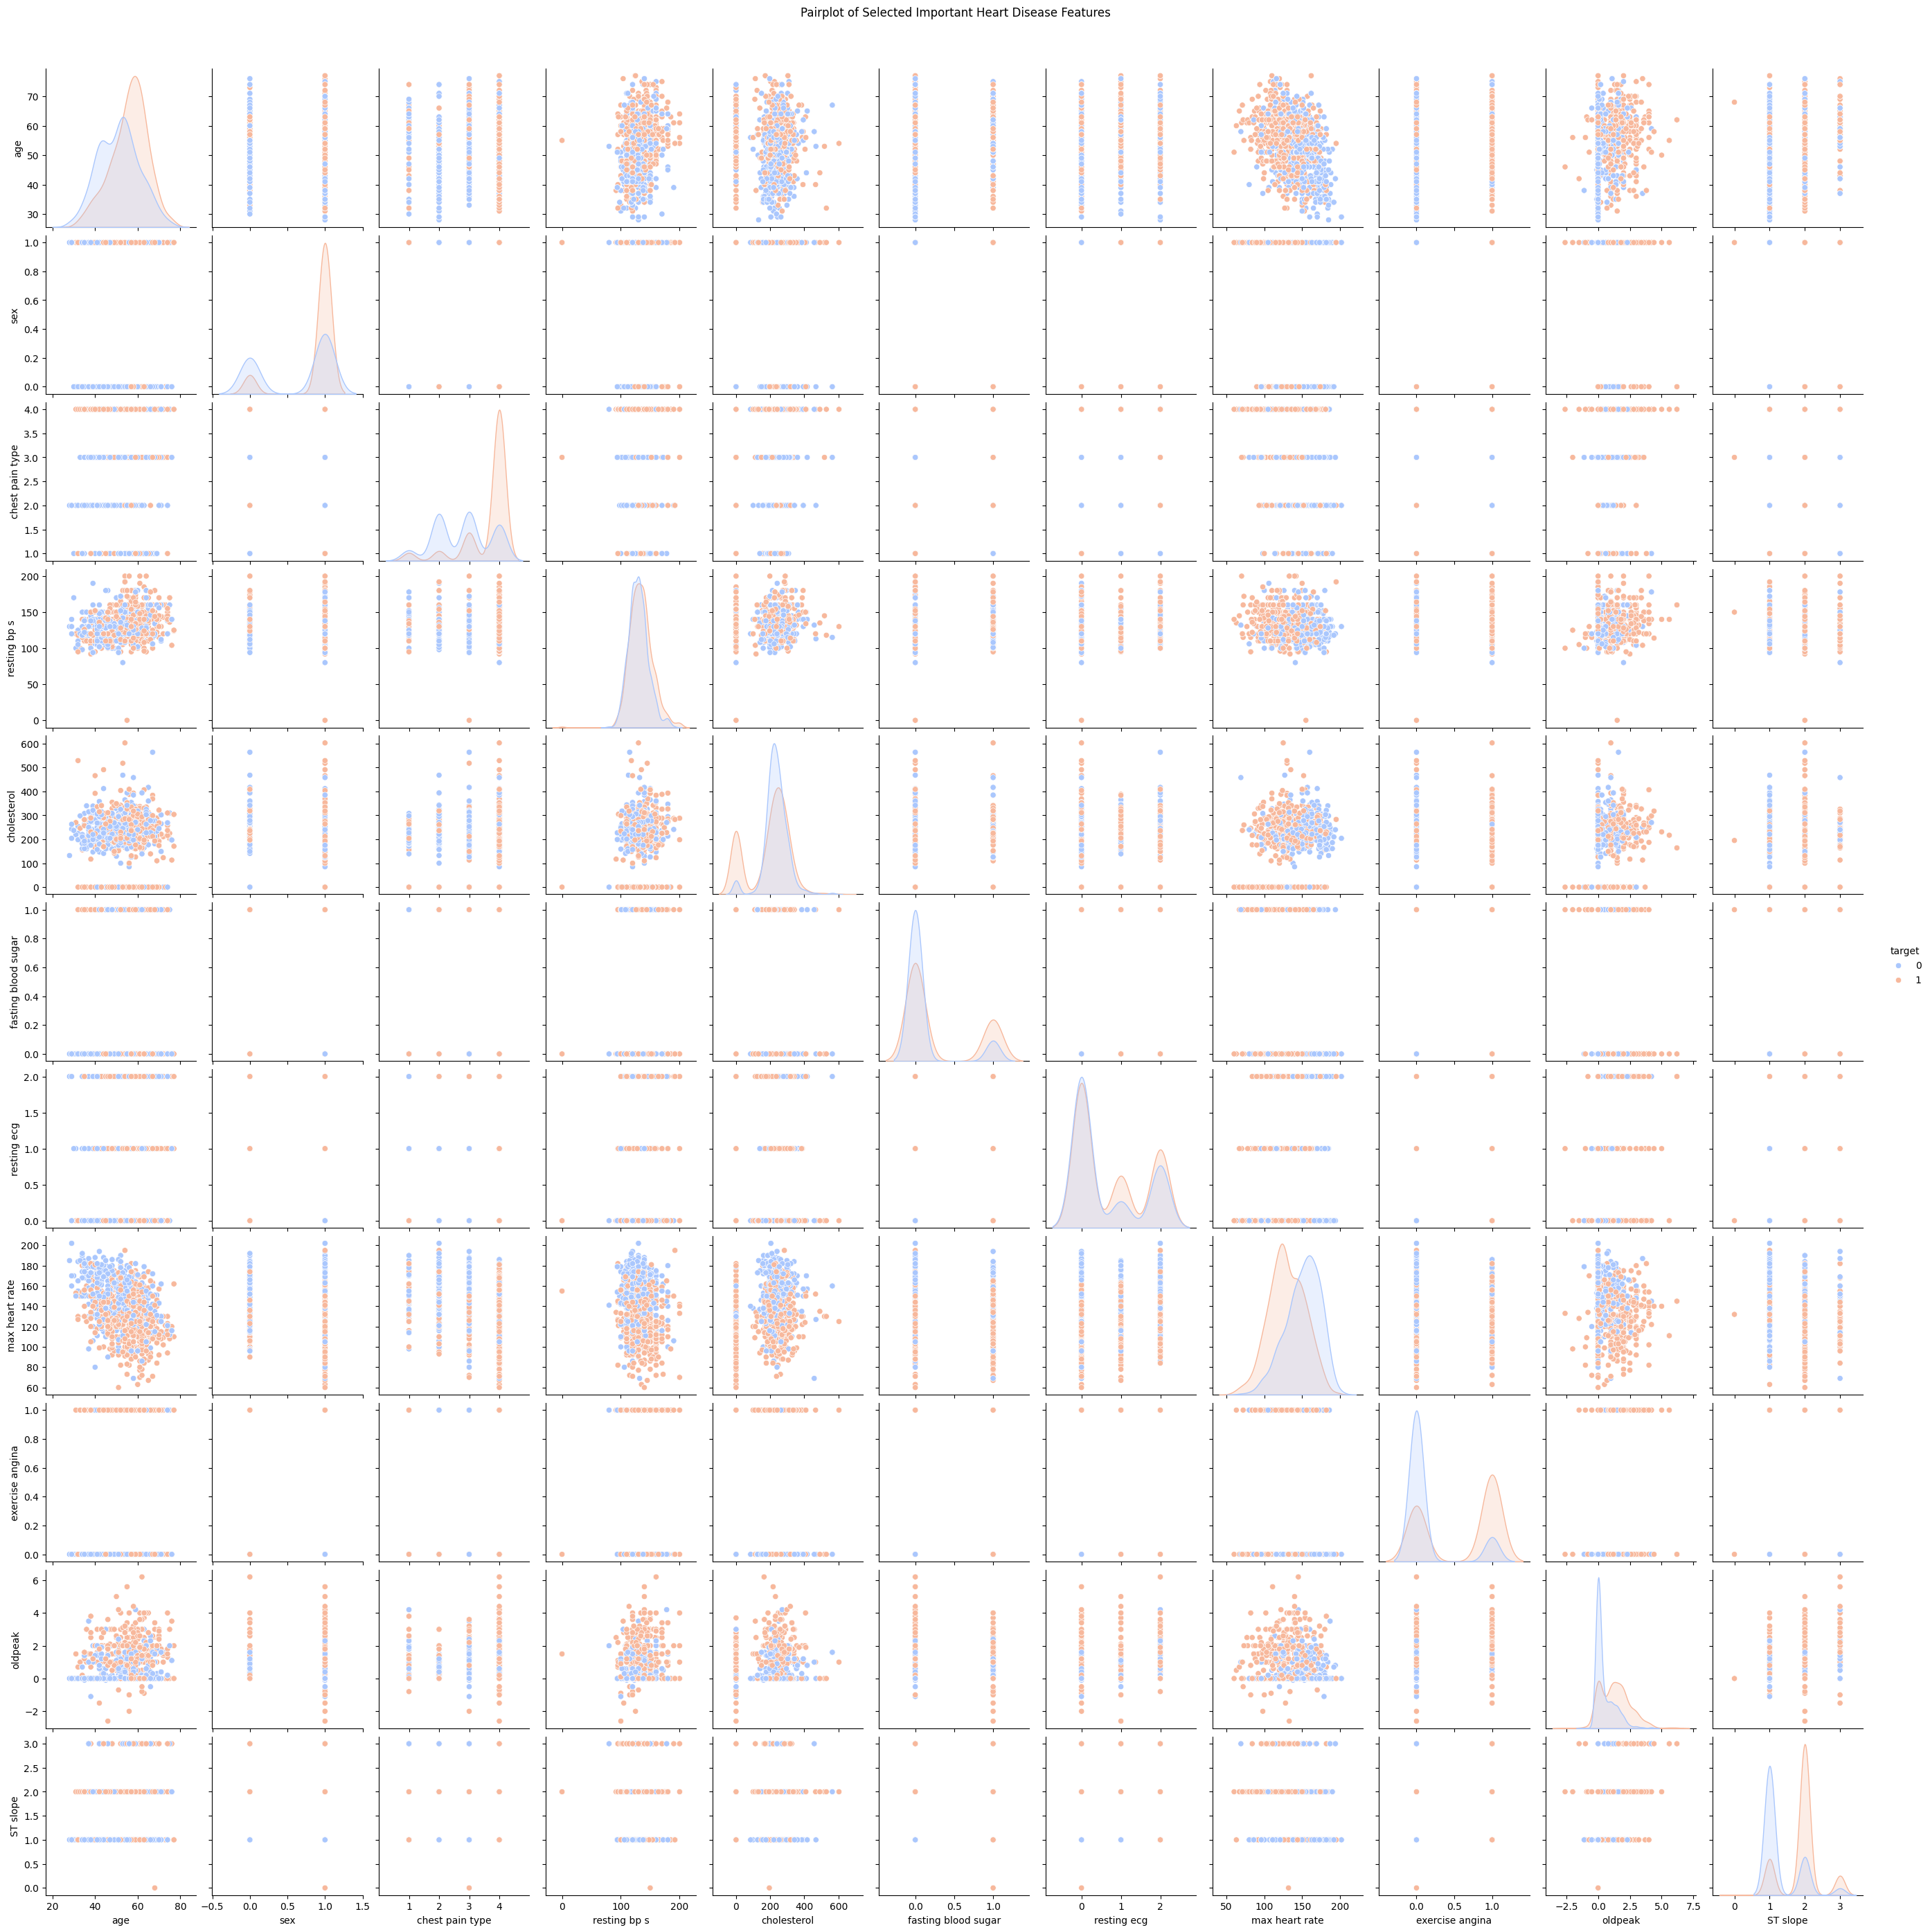

In [77]:
sns.pairplot(df, hue="target", palette="coolwarm", diag_kind="kde")
plt.suptitle("Pairplot of Selected Important Heart Disease Features", y=1.02)
plt.show()

In [78]:
df["cholesterol"] = df["cholesterol"].replace(0, np.nan)
df["resting bp s"].replace(0, np.nan)
df["ST slope"].replace(0, np.nan)

0       1.0
1       2.0
2       1.0
3       2.0
4       1.0
       ... 
1185    2.0
1186    2.0
1187    2.0
1188    2.0
1189    1.0
Name: ST slope, Length: 1190, dtype: float64

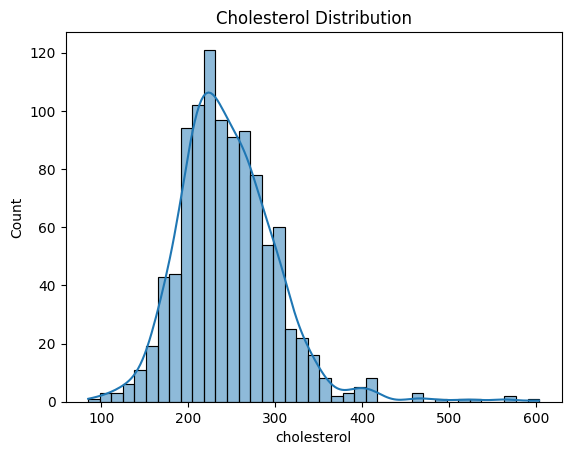

In [79]:
sns.histplot(df["cholesterol"], kde=True)
plt.title("Cholesterol Distribution")
plt.show()

In [80]:
df["cholesterol"] = df["cholesterol"].fillna(df["cholesterol"].median())
df['resting bp s'] = df['resting bp s'].fillna(df['resting bp s'].mean())
df['ST slope'] = df['ST slope'].fillna(df['ST slope'].mode()[0])

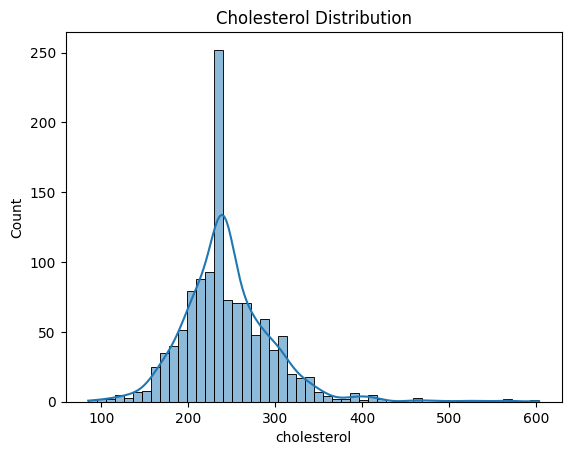

In [81]:
sns.histplot(df["cholesterol"], kde=True)
plt.title("Cholesterol Distribution")
plt.show()

<Axes: >

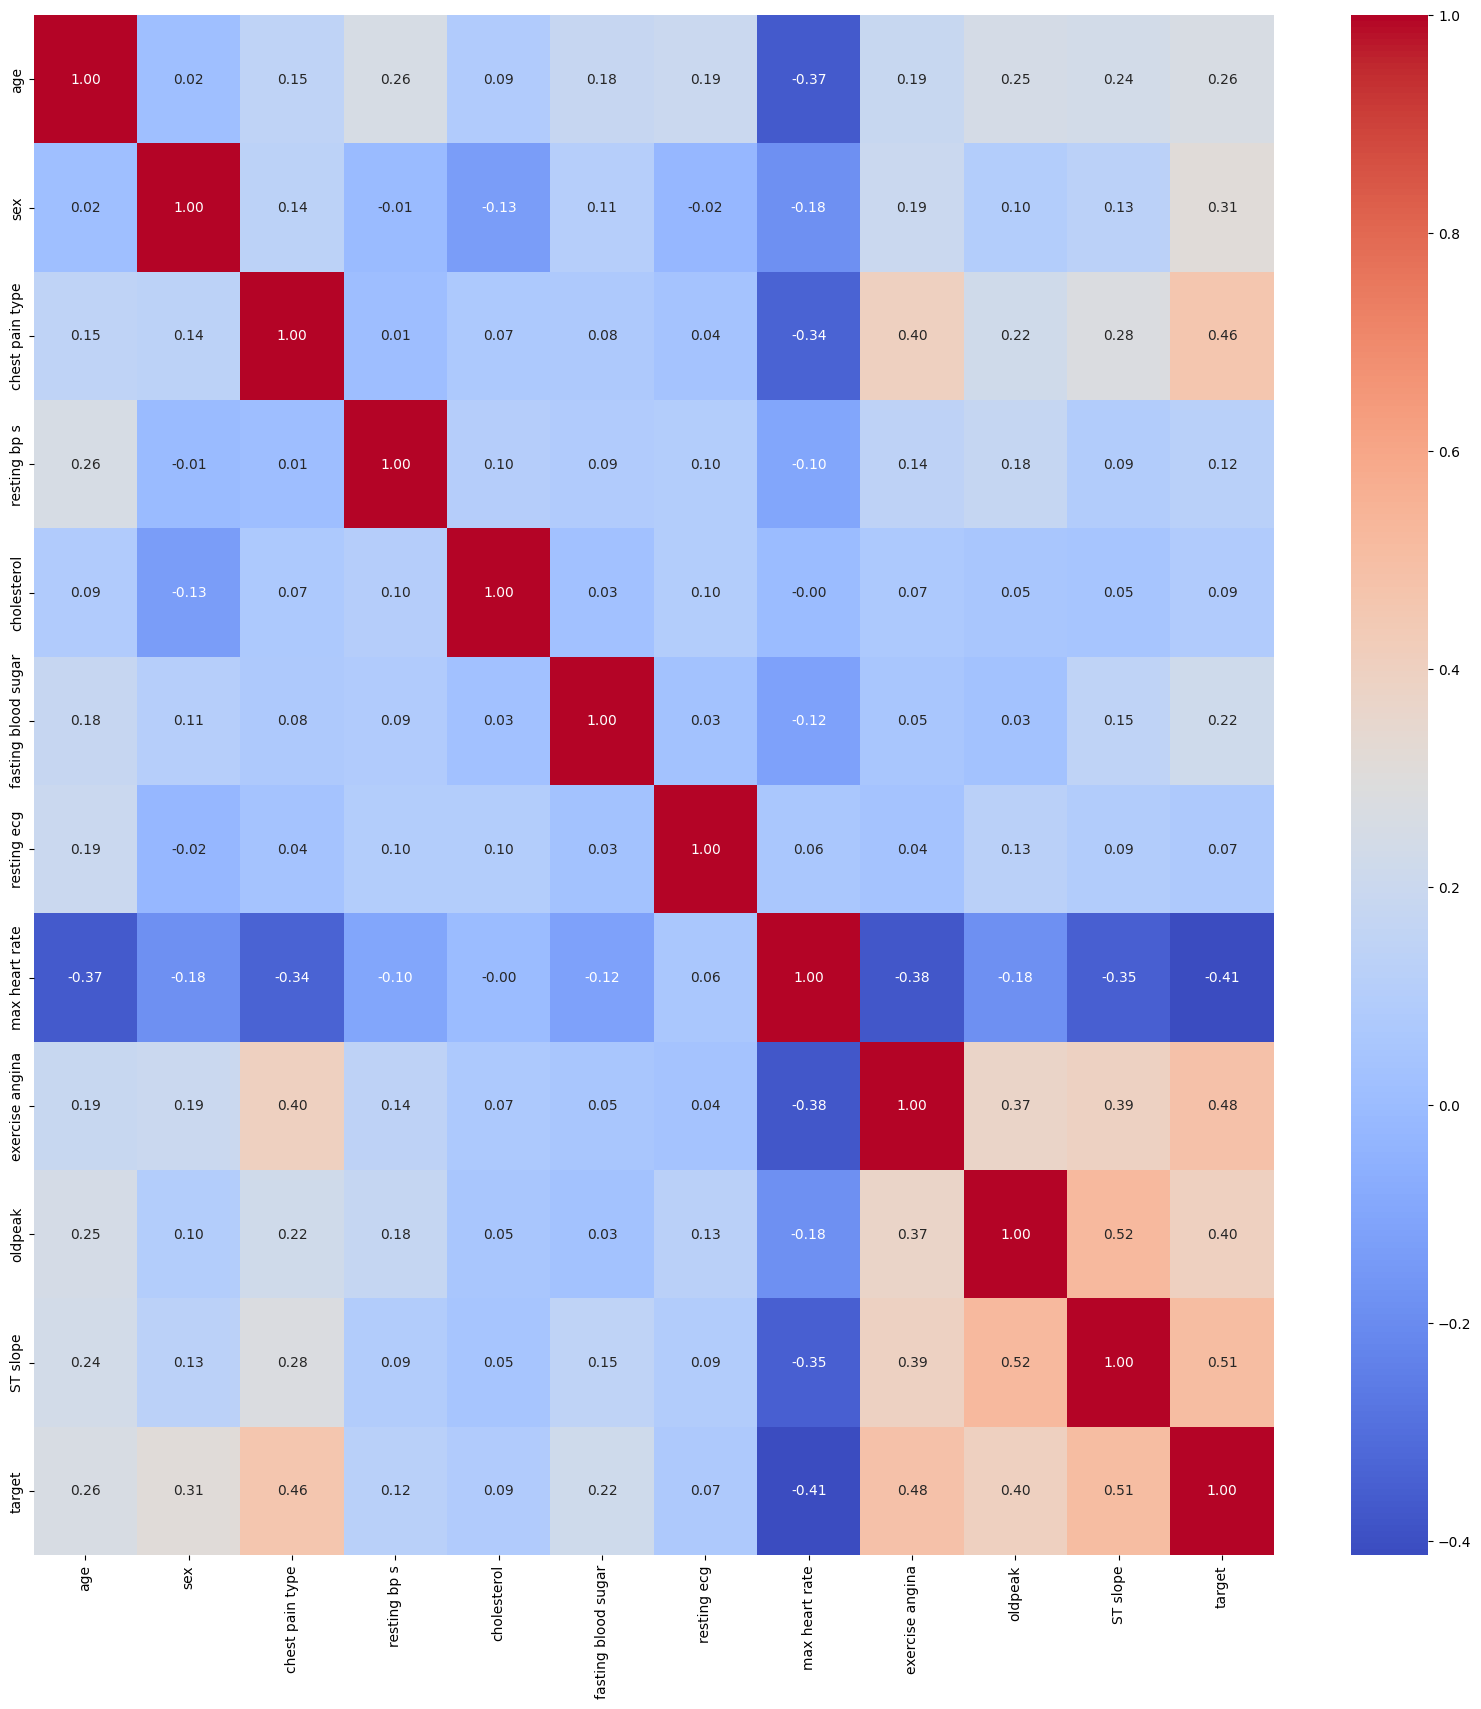

In [82]:
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')

In [83]:
correlation = df.corr()['target'].drop('target')
correlation.sort_values(ascending=False)

ST slope               0.505608
exercise angina        0.481467
chest pain type        0.460127
oldpeak                0.398385
sex                    0.311267
age                    0.262029
fasting blood sugar    0.216695
resting bp s           0.121415
cholesterol            0.086290
resting ecg            0.073059
max heart rate        -0.413278
Name: target, dtype: float64

In [84]:
df = df.drop(columns=['oldpeak'])

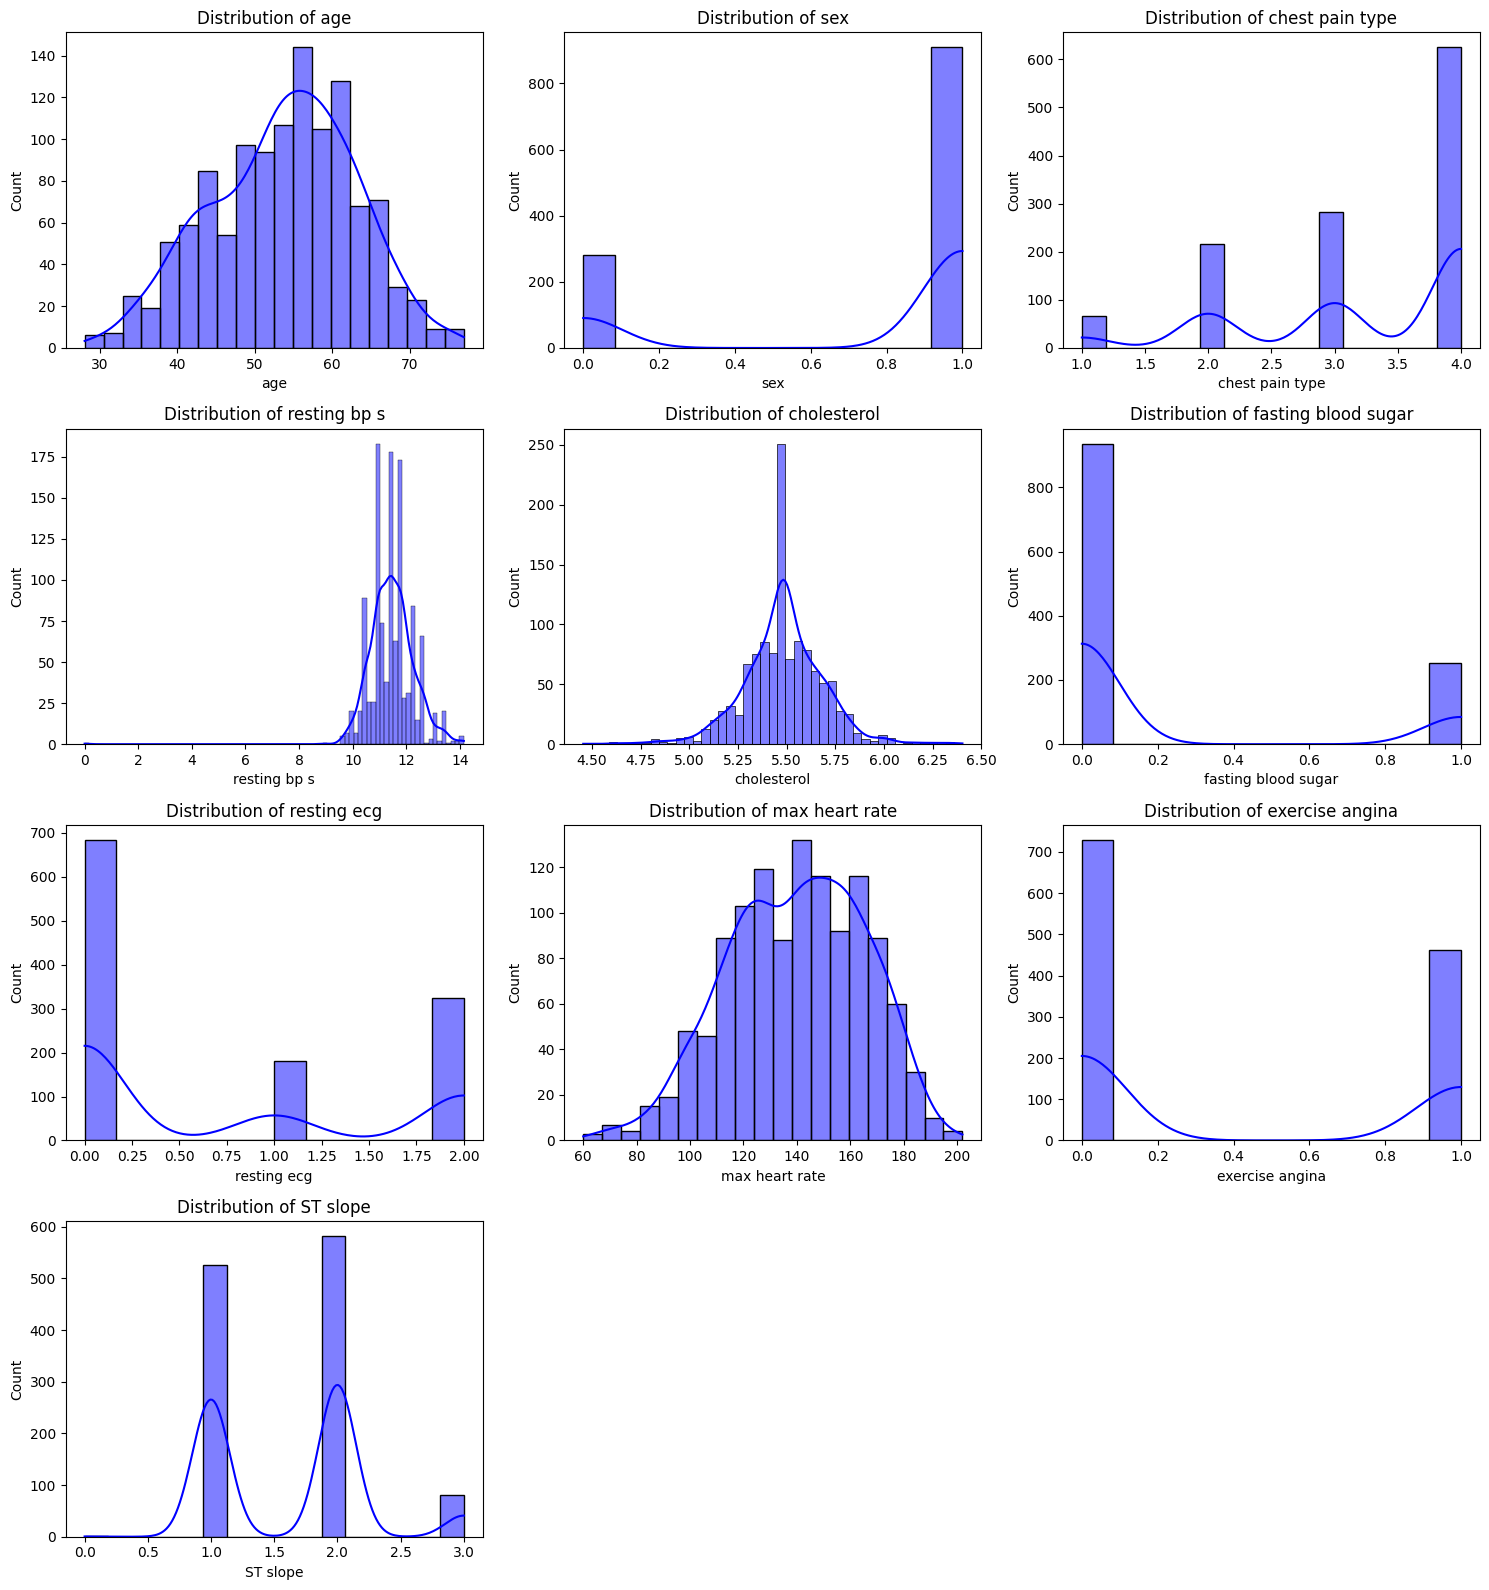

In [108]:
cols = [col for col in df.columns if col != 'target']

num_features = len(cols)
cols_per_row = 3
rows = (num_features + cols_per_row - 1) // cols_per_row

plt.figure(figsize=(cols_per_row * 5, rows * 4))

for i, col in enumerate(cols, 1):
    plt.subplot(rows, cols_per_row, i)
    sns.histplot(df[col].dropna(), kde=True, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [86]:
df['cholesterol'] = np.log1p(df['cholesterol'])
df['resting bp s'] = np.sqrt(df['resting bp s'])

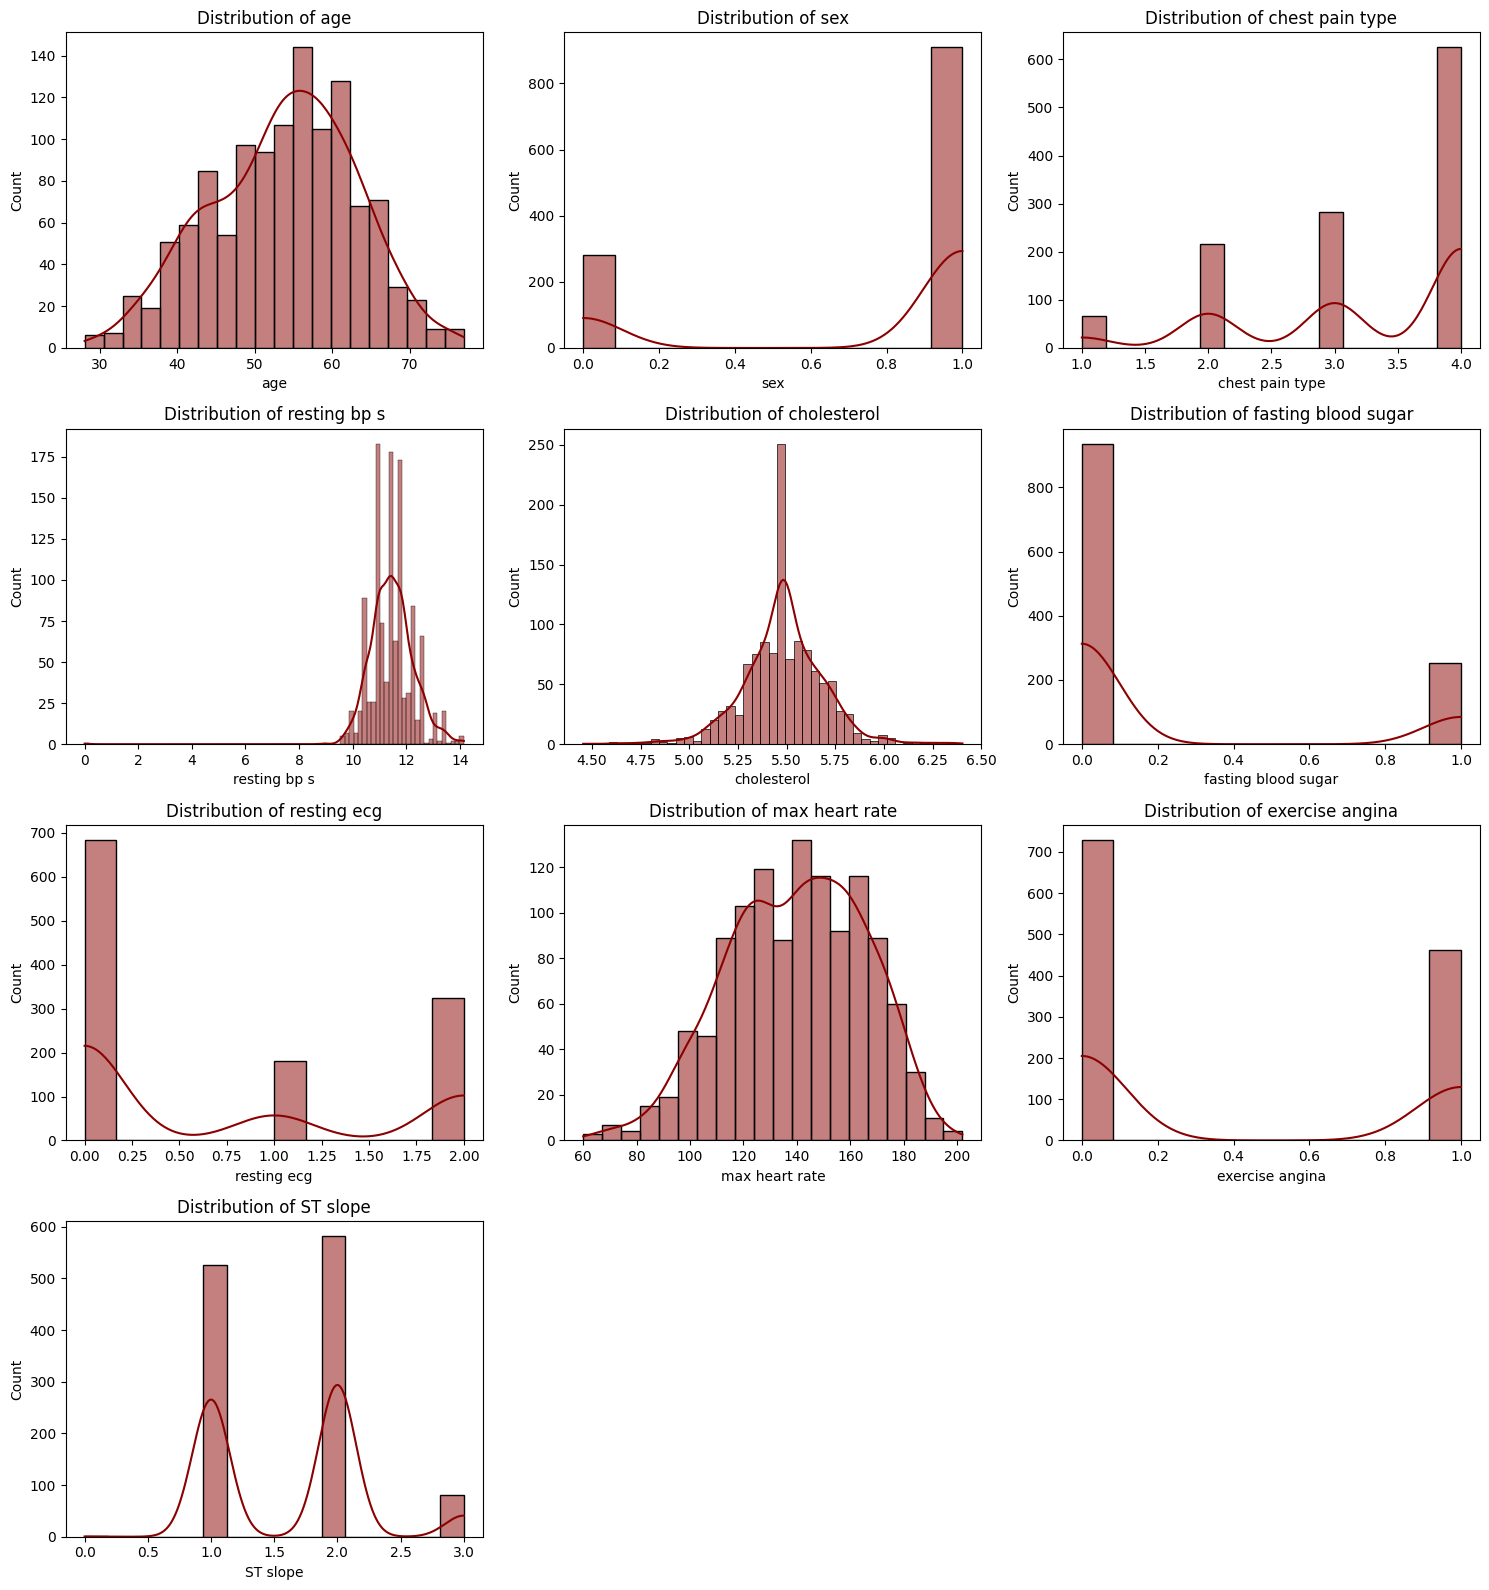

In [87]:
cols = [col for col in df.columns if col != 'target']

num_features = len(cols)
cols_per_row = 3
rows = (num_features + cols_per_row - 1) // cols_per_row

plt.figure(figsize=(cols_per_row * 5, rows * 4))

for i, col in enumerate(cols, 1):
    plt.subplot(rows, cols_per_row, i)
    sns.histplot(df[col].dropna(), kde=True, color='darkred')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [88]:
X = df.drop('target', axis=1)
X

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,ST slope
0,40,1,2,11.832160,5.669881,0,0,172,0,1
1,49,0,3,12.649111,5.198497,0,0,156,0,2
2,37,1,2,11.401754,5.648974,0,1,98,0,1
3,48,0,4,11.747340,5.370638,0,0,108,1,2
4,54,1,3,12.247449,5.278115,0,0,122,0,1
...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,10.488088,5.579730,0,0,132,0,2
1186,68,1,4,12.000000,5.267858,1,0,141,0,2
1187,57,1,4,11.401754,4.882802,0,0,115,1,2
1188,57,0,2,11.401754,5.468060,0,2,174,0,2


In [89]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((833, 10), (357, 10), (833,), (357,))

In [90]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled, X_test_scaled

(array([[-1.56610611,  0.57503993,  0.81505412, ..., -0.02428744,
         -0.76791579,  0.64841466],
        [ 0.87789707, -1.73900966,  0.81505412, ...,  0.17682032,
         -0.76791579,  2.29014539],
        [ 0.77163606,  0.57503993,  0.81505412, ..., -1.31137713,
          1.30222612,  2.29014539],
        ...,
        [ 0.77163606,  0.57503993, -2.33304517, ...,  0.17682032,
         -0.76791579,  0.64841466],
        [ 0.87789707, -1.73900966,  0.81505412, ...,  0.78014361,
         -0.76791579,  2.29014539],
        [-1.24732309,  0.57503993, -1.28367874, ...,  0.86058672,
         -0.76791579, -0.99331607]], shape=(833, 10)),
 array([[ 0.77163606,  0.57503993,  0.81505412, ...,  0.17682032,
         -0.76791579,  0.64841466],
        [ 0.027809  ,  0.57503993, -0.23431231, ...,  0.37792808,
          1.30222612,  0.64841466],
        [ 0.13407001, -1.73900966, -1.28367874, ...,  0.57903585,
         -0.76791579, -0.99331607],
        ...,
        [ 1.72798513,  0.57503993,  0

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report

rf_model = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=42, min_samples_leaf=3, min_samples_split=2)
rf_model.fit(X_train, y_train)
     

RandomForestClassifier(min_samples_leaf=3, random_state=42)

In [93]:
y_pred = rf_model.predict(X_test)
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       107
           1       0.90      0.92      0.91       131

    accuracy                           0.90       238
   macro avg       0.90      0.90      0.90       238
weighted avg       0.90      0.90      0.90       238



In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report

rf_model = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42, min_samples_leaf=3, min_samples_split=2)
rf_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', min_samples_leaf=3, random_state=42)

In [95]:
y_pred = rf_model.predict(X_test)
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.90       107
           1       0.91      0.94      0.92       131

    accuracy                           0.92       238
   macro avg       0.92      0.91      0.91       238
weighted avg       0.92      0.92      0.92       238



In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report

rf_model = RandomForestClassifier(n_estimators=100, criterion='log_loss', random_state=42, min_samples_leaf=3, min_samples_split=2)
rf_model.fit(X_train, y_train)

RandomForestClassifier(criterion='log_loss', min_samples_leaf=3,
                       random_state=42)

In [97]:
y_pred = rf_model.predict(X_test)
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.90       107
           1       0.91      0.94      0.92       131

    accuracy                           0.92       238
   macro avg       0.92      0.91      0.91       238
weighted avg       0.92      0.92      0.92       238



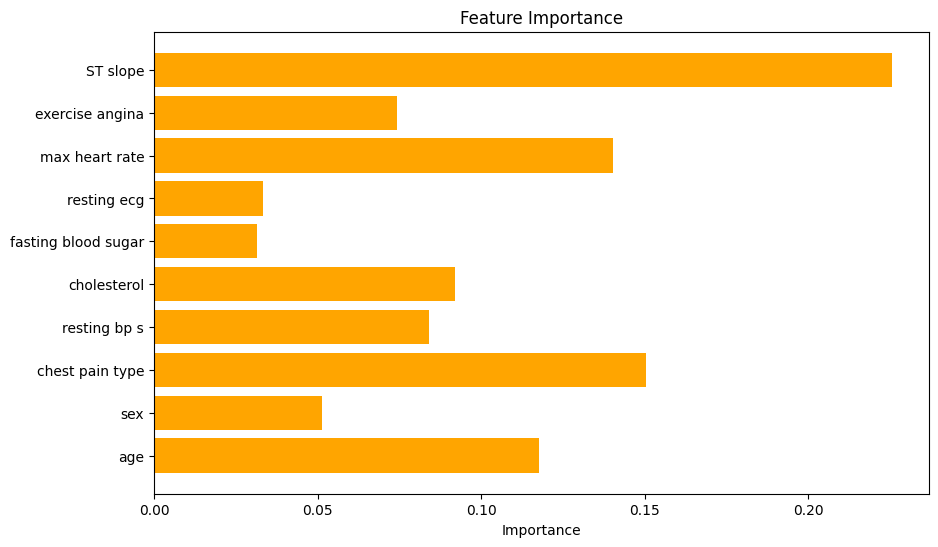

In [106]:
features = X.columns.tolist()
features_importance = rf_model.feature_importances_

plt.figure(figsize=(10, 6))
plt.barh(features, features_importance, color='orange')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

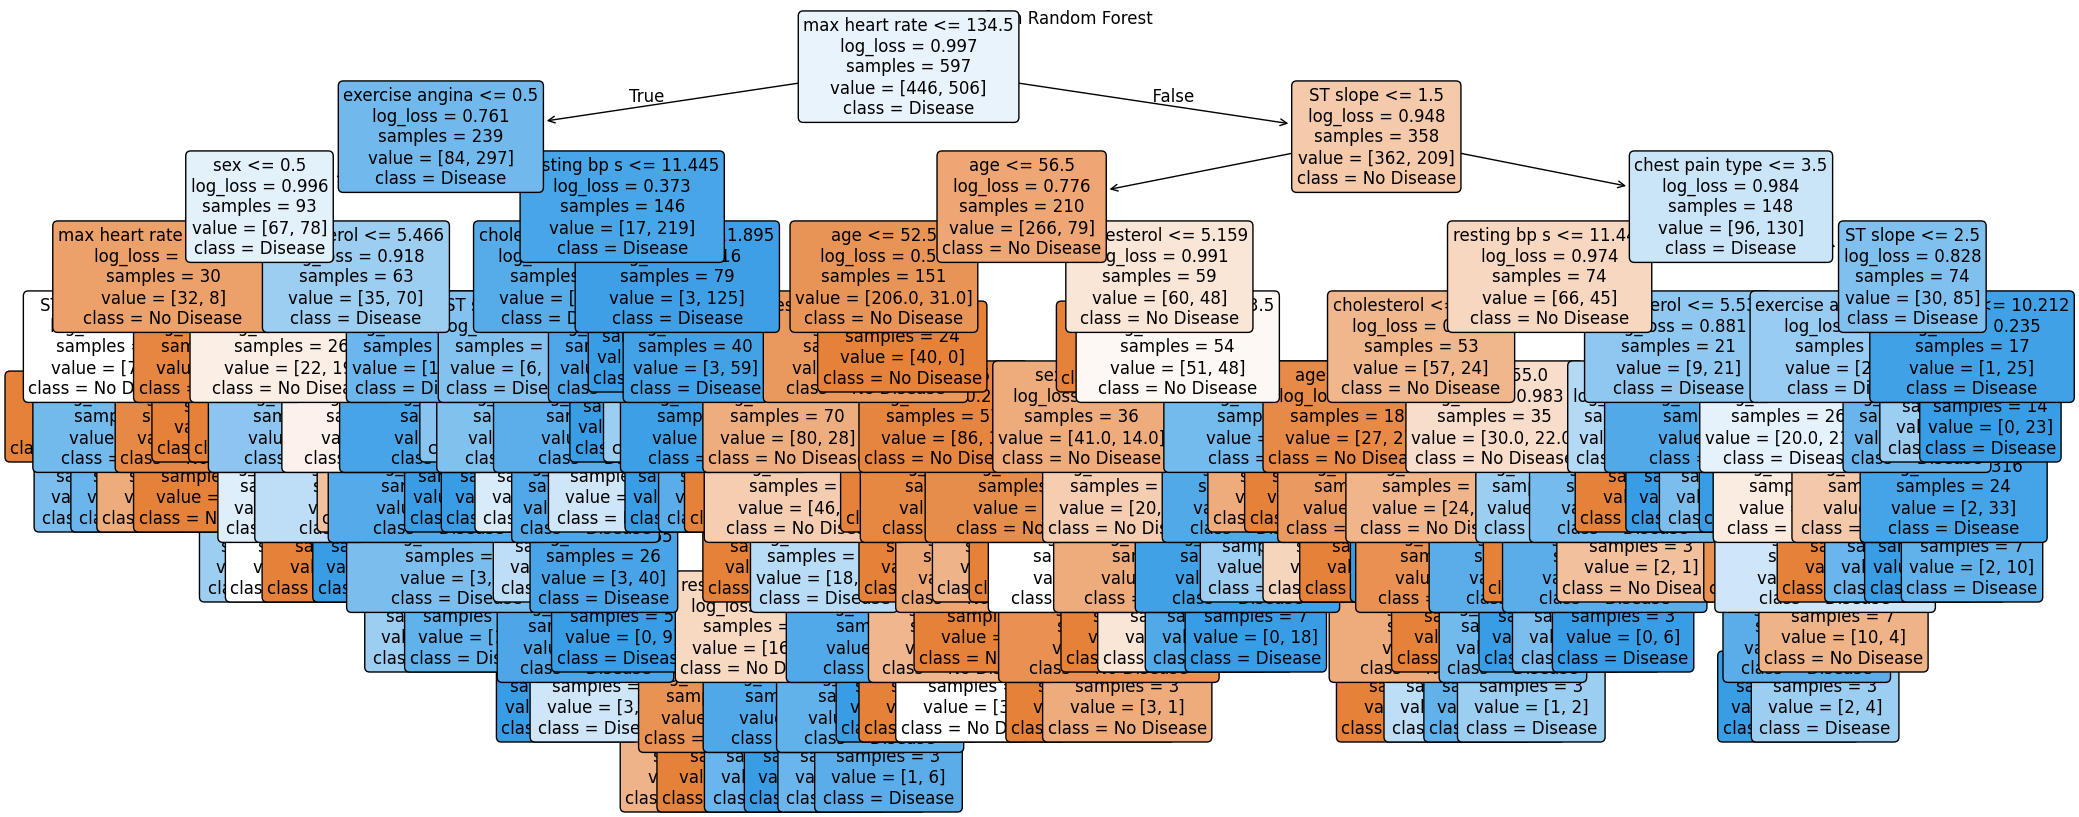

In [99]:
plt.figure(figsize=(25, 10))
plot_tree(rf_model.estimators_[0],
          feature_names=X.columns,
          class_names=["No Disease", "Disease"],
          filled=True, rounded=True, fontsize=12)
plt.title("Tree 0 from Random Forest")
plt.show()

In [100]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

c4_5 = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)
c4_5.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)

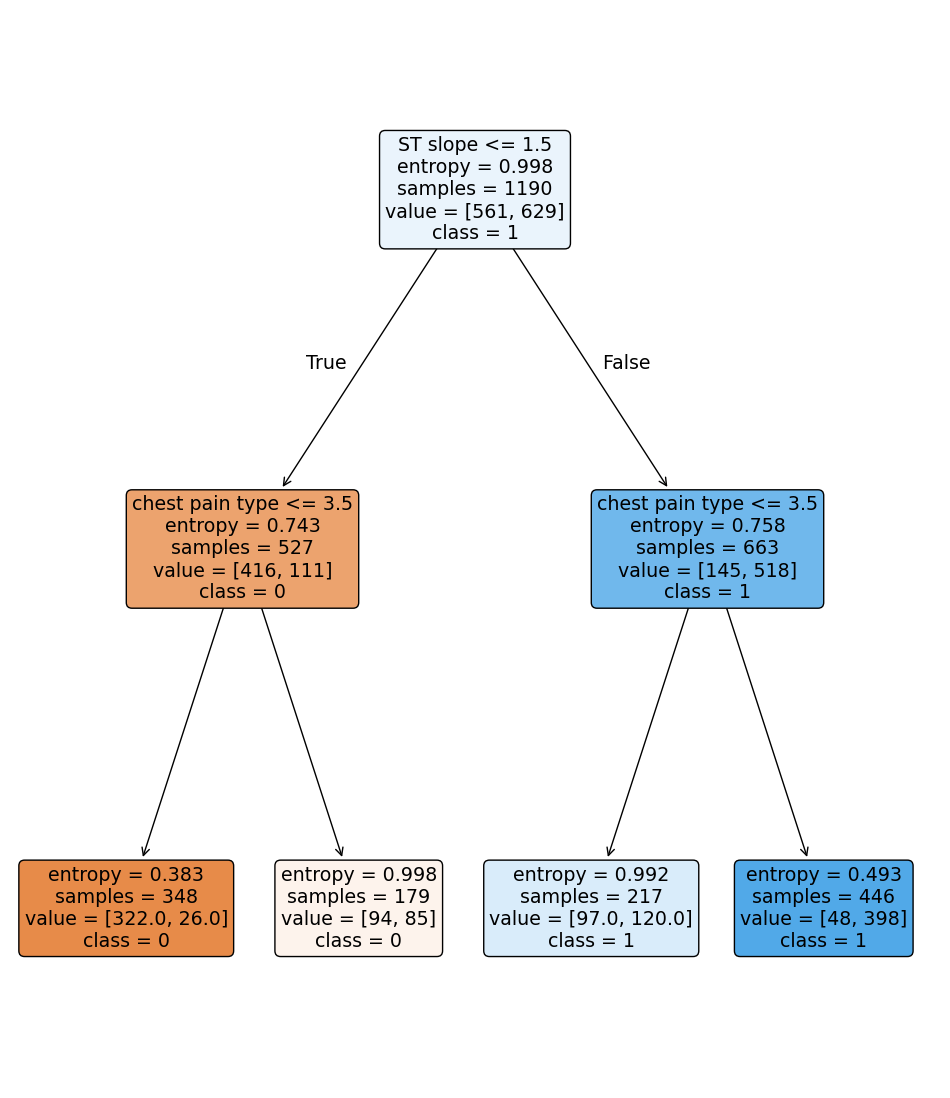

In [101]:
plt.figure(figsize=(12,14))
tree.plot_tree(c4_5, feature_names= X.columns.tolist(), class_names=['0', '1'], filled=True, rounded=True)
plt.savefig('./c4_5_tree.png', bbox_inches="tight")

In [102]:
cart = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
cart.fit(X, y)
y_pred_cart = cart.predict(X)

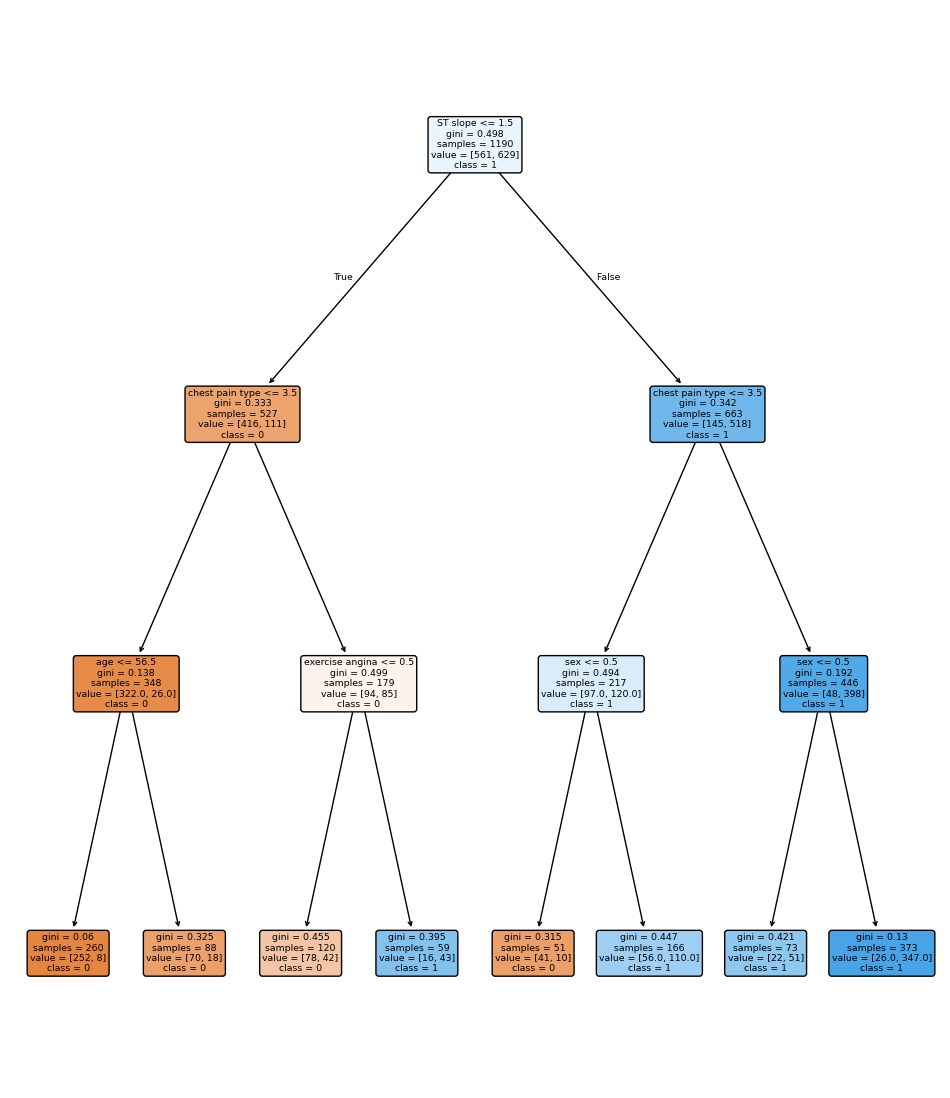

In [103]:
plt.figure(figsize=(12,14))
tree.plot_tree(cart, feature_names= X.columns.tolist(), class_names=['0', '1'], filled=True, rounded=True)
plt.savefig('./cart_tree.png', bbox_inches="tight")

In [104]:
print("CART Tree Depth:", cart.get_depth())
print("CART Number of Leaves:", cart.get_n_leaves())

CART Tree Depth: 3
CART Number of Leaves: 8


In [105]:
print("\nCART Feature Importances: ")
for feature, importance in zip(X.columns, cart.feature_importances_): print(f" {feature}: {importance:.4f}")


CART Feature Importances: 
 age: 0.0132
 sex: 0.0781
 chest pain type: 0.2370
 resting bp s: 0.0000
 cholesterol: 0.0000
 fasting blood sugar: 0.0000
 resting ecg: 0.0000
 max heart rate: 0.0000
 exercise angina: 0.0376
 ST slope: 0.6341
